# Feature Importance Determination

In [10]:
from utils.feature_analyzer import *
from utils.preprocessing import *
from utils.utils import *
from ..tests.test_utils import *

ImportError: attempted relative import with no known parent package

## Determine Important Features

In [9]:
RANDOM_STATE = 42

# Load the dataset
df = add_checked(pd.read_csv("../../data/synth_data_train_labeled.csv"))
df.head()

NameError: name 'add_checked' is not defined

In [3]:
# Checking for Null values
df.isnull().sum()/len(df)*100

adres_aantal_brp_adres                      0.0
adres_aantal_verschillende_wijken           0.0
adres_aantal_verzendadres                   0.0
adres_aantal_woonadres_handmatig            0.0
adres_dagen_op_adres                        0.0
                                           ... 
typering_transport__logistiek___tuinbouw    0.0
typering_zorg__schoonmaak___welzijn         0.0
Ja                                          0.0
Nee                                         0.0
checked                                     0.0
Length: 318, dtype: float64

In [4]:
fa = FeatureAnalyzer()

In [5]:
# fa.evaluate_importance(dataframe=df, target='checked', add_drop=['Ja', 'Nee']) # Uncomment this line if you don't have the feature_importance.pkl file
fa.load_importance(filepath='feature_importance.pkl')

C:\Users\chena\PycharmProjects\TestingProject\src\team_1\utils\feature_analyzer.py:90: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


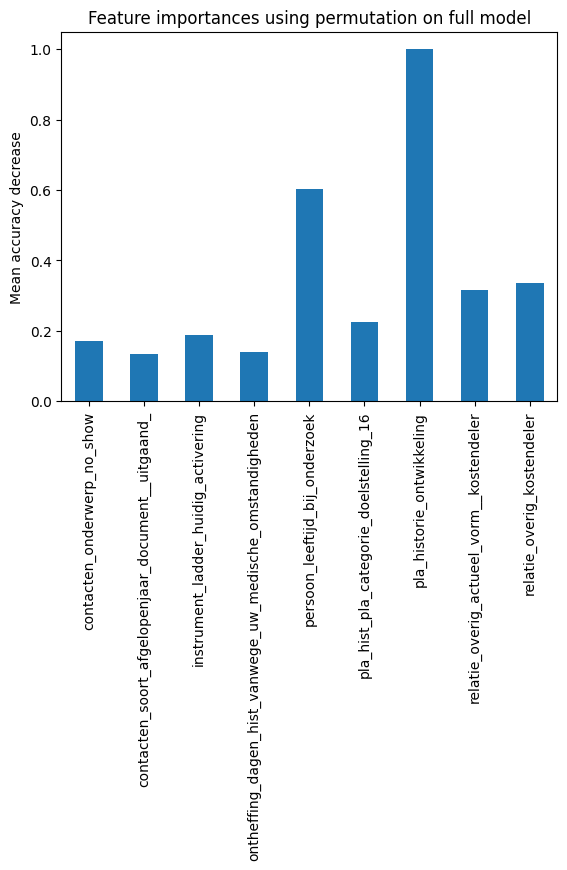

In [6]:
X = df.drop(['checked', 'Ja', 'Nee'], axis=1)
y = df['checked']
fa.plot_importance(column_names=X.columns, min_val=0.1)

In [7]:
fad = fa.feature_importance_as_dict(column_names=X.columns, normalize=True)
print(fad)

{'adres_aantal_brp_adres': 0.0, 'adres_aantal_verschillende_wijken': 0.0, 'adres_aantal_verzendadres': 4.747436384325571e-05, 'adres_aantal_woonadres_handmatig': 0.00023737181921627853, 'adres_dagen_op_adres': 0.00090201291302734, 'adres_recentst_onderdeel_rdam': 0.0, 'adres_recentste_buurt_groot_ijsselmonde': 0.0, 'adres_recentste_buurt_nieuwe_westen': 0.0, 'adres_recentste_buurt_other': 0.0, 'adres_recentste_buurt_oude_noorden': 0.0, 'adres_recentste_buurt_vreewijk': 0.0, 'adres_recentste_plaats_other': 0.0, 'adres_recentste_plaats_rotterdam': 0.0, 'adres_recentste_wijk_charlois': 0.0, 'adres_recentste_wijk_delfshaven': 0.0, 'adres_recentste_wijk_feijenoord': 0.0, 'adres_recentste_wijk_ijsselmonde': 0.0, 'adres_recentste_wijk_kralingen_c': 0.0, 'adres_recentste_wijk_noord': 0.0, 'adres_recentste_wijk_other': 0.0, 'adres_recentste_wijk_prins_alexa': 0.00023737181921627853, 'adres_recentste_wijk_stadscentru': 0.0, 'adres_unieke_wijk_ratio': 0.0, 'afspraak_aanmelding_afgesloten': 0.0, '

In [8]:
description = pd.read_csv("../../data/data_description.csv", encoding='latin1')
description.head()

,ID,Feature (nl),Feature (en),Datatype,Relative importance,Variable description,Additional explanation
0,1,adres_aantal_brp_adres,address_number_personal_records_database_addre...,int,6.370792,"Number of different addresses of a customer, p...",NaN
1,2,adres_aantal_verschillende_wijken,address_number_different_districts,int,1.864204,Number of different neighborhoods a customer h...,NaN
2,3,adres_aantal_verzendadres,address_number_mail_address,int,4.679638,"Number of different addresses of a customer, p...",NaN
3,4,adres_aantal_woonadres_handmatig,address_number_residential_address_manual,int,2.385514,"Number of different addresses of a customer, p...",NaN
4,5,adres_dagen_op_adres,address_days_at_address,int,23.329141,Number of days a customer lives at the current...,NaN


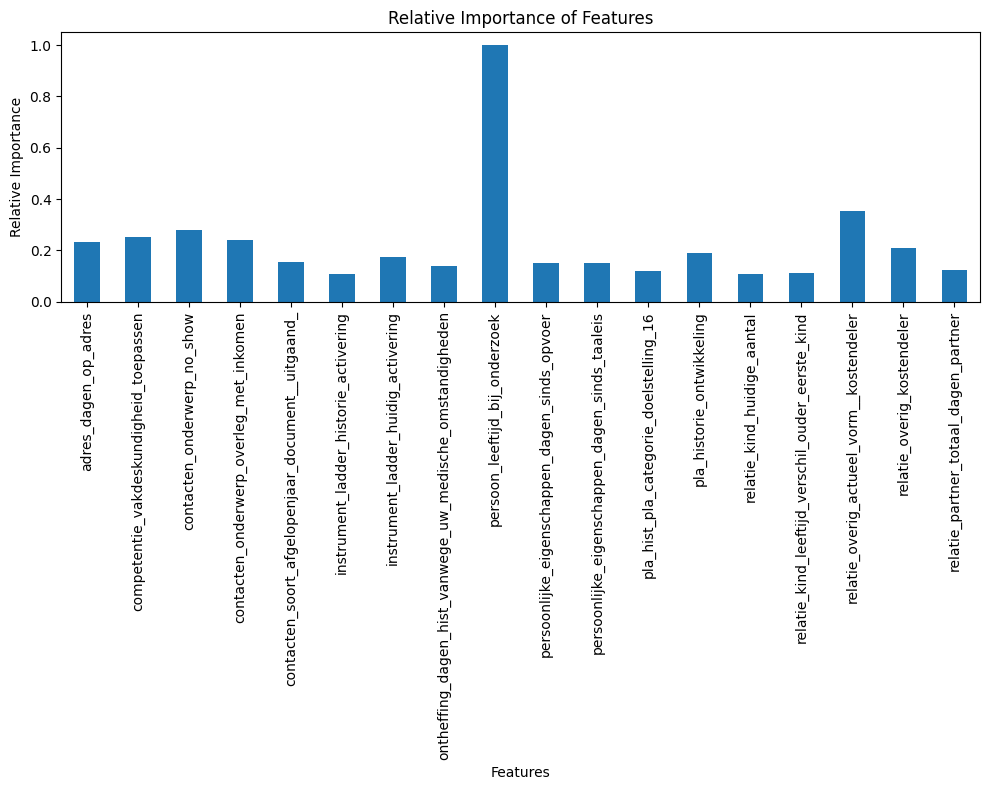

In [9]:
scaler = MinMaxScaler()
description['Relative importance'] = scaler.fit_transform(description[['Relative importance']])
filtered_description = description[description['Relative importance'] > 0.1]

plt.figure(figsize=(10, 8))
ax = filtered_description['Relative importance'].plot(kind='bar')
ax.set_xticklabels(filtered_description['Feature (nl)'], rotation=90)
plt.title('Relative Importance of Features')
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.tight_layout()
plt.show()

In [10]:
def get_important_features(top, fad, filtered_description):
    TOP = top
    sorted_fad = {k: v for k, v in sorted(fad.items(), key=lambda item: item[1], reverse=True)}

    sorted_feature_names = list(sorted_fad.keys())[:TOP]
    sorted_importances_mean = list(sorted_fad.values())[:TOP]
    
    filtered_description = filtered_description.sort_values(by='Relative importance', ascending=False)
    filtered_description_sorted = filtered_description['Feature (nl)'][:TOP]
    
    most_important_features_new = set(sorted_feature_names)
    most_important_features_original = set(filtered_description_sorted)
    # print("Most important features according to RF:")
    # print(most_important_features_new)
    # print("Most important features according to original data:")
    # print(most_important_features_original)
    
    intersection = most_important_features_new.intersection(most_important_features_original)
    percentage_intersection = len(intersection) / len(most_important_features_original) * 100
    # print(f"Similarity between original importance and RF: {percentage_intersection:.2f}%")
    return most_important_features_new

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [12]:
feature_sizes = [10, 20, 40, 80, 160]
accuracies = []

def train(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    selector = VarianceThreshold()    
    classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    pipeline = Pipeline(steps=[('feature selection', selector), ('classification', classifier)])

    # Let's train a simple model
    pipeline.fit(X_train, y_train)
    
    # Let's evaluate the model
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

original_accuracy = train(X, y)
print(f'Original Accuracy: {original_accuracy}')

for size in feature_sizes:
    features = get_important_features(size, fad, filtered_description)
    
    preprocessor = DataProcessor(X, y, features)
    X_processed, y_processed = preprocessor.preprocess(remove_features=True)
    
    print(f'Processed data dimensions: {X_processed.shape}')
    
    processed_accuracy = train(X_processed, y_processed)
    accuracies.append(processed_accuracy)
    
best_number_of_features = feature_sizes[accuracies.index(max(accuracies))]
print(f'Best performing number of features: {best_number_of_features}')
print(f'Accuracy: {max(accuracies)}')

Original Accuracy: 0.9397538461538462
Dataframe before dimensionality reduction: (130000, 315)
Dataframe after dimensionality reduction: (130000, 10)
Processed data dimensions: (68264, 10)
Dataframe before dimensionality reduction: (130000, 315)
Dataframe after dimensionality reduction: (130000, 20)
Processed data dimensions: (68264, 20)
Dataframe before dimensionality reduction: (130000, 315)
Dataframe after dimensionality reduction: (130000, 40)
Processed data dimensions: (68264, 40)
Dataframe before dimensionality reduction: (130000, 315)
Dataframe after dimensionality reduction: (130000, 80)
Processed data dimensions: (68264, 80)
Dataframe before dimensionality reduction: (130000, 315)
Dataframe after dimensionality reduction: (130000, 160)
Processed data dimensions: (68264, 160)
Best performing number of features: 160
Accuracy: 0.9063635298253838


# Nested Cross Validation

In [13]:
features = get_important_features(best_number_of_features, fad, filtered_description)
preprocessor = DataProcessor(X, y, features)
X_processed, y_processed = preprocessor.preprocess(remove_features=True)

Dataframe before dimensionality reduction: (130000, 315)
Dataframe after dimensionality reduction: (130000, 160)


In [14]:
selector = VarianceThreshold()
classifier = GradientBoostingClassifier(random_state=0)

In [15]:
# Define hyperparameter grid
parameters=[{'max_depth':[1,3,5],'learning_rate': [0.01,0.1,1.0],'n_estimators':[100,250,500]}]

In [16]:
mean, std = nested_cv(X, y, classifier, parameters)
print('Accuracy of original model: %.3f (%.3f)' % (mean, std))

(130000, 315)
(130000,)
GradientBoostingClassifier(random_state=0)
[{'max_depth': [1, 3, 5], 'learning_rate': [0.01, 0.1, 1.0], 'n_estimators': [100, 250, 500]}]


KeyboardInterrupt: 

In [ ]:
mean_processed, std_processed = nested_cv(X_processed, y_processed, classifier, parameters)
print('Accuracy of processed model: %.3f (%.3f)' % (mean_processed, std_processed))

## The Best Model Evaluation

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../../data/Experiment_persoon_geslacht_vrouw/0.csv')
df.head(10)

,0,adres_aantal_verschillende_wijken,adres_aantal_verzendadres,adres_aantal_woonadres_handmatig,adres_dagen_op_adres,adres_recentst_onderdeel_rdam,adres_recentste_buurt_groot_ijsselmonde,adres_recentste_buurt_nieuwe_westen,adres_recentste_buurt_other,adres_recentste_buurt_oude_noorden,...,typering_hist_inburgeringsbehoeftig,typering_hist_ind,typering_hist_sector_zorg,typering_ind,typering_indicatie_geheime_gegevens,typering_other,typering_transport__logistiek___tuinbouw,typering_zorg__schoonmaak___welzijn,Ja,Nee
0,1,1,0,0,24122,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0.585136,0.414864
1,1,1,0,0,24318,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0.602229,0.397771
2,1,1,0,0,24279,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0.615721,0.384279
3,4,2,1,0,9166,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0.587054,0.412946
4,1,1,0,0,23234,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0.485379,0.514621
5,1,1,0,0,24254,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0.613801,0.386199
6,1,1,0,0,24331,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0.644217,0.355783
7,3,2,0,1,12833,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0.716072,0.283928
8,1,1,0,0,24263,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0.627260,0.372740
9,1,1,0,0,23697,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0.655545,0.344455
